# **Large Language Models**

*Auteur : HANNOUNI SALMA*

# **Objectifs pédagogiques du TP**

Comprendre les concepts fondamentaux des modèles de langage (LLM).

1. Expliquer le rôle des tokens, de la tokenisation et des embeddings.
2. Décrire l’architecture Transformer et son fonctionnement.
3. Manipuler un LLM pré-entraîné avec HuggingFace.
4. Générer du texte en modifiant les paramètres de génération.
5. Expérimenter différentes techniques de prompt engineering.

# **I. Introduction Conceptuelle**

## **1. Qu’est-ce qu’un LLM ?**

Un **Large Language Model (LLM)** est un modèle d’intelligence artificielle entraîné sur des milliards de phrases pour **prédire le prochain token** dans une séquence.

Il apprend les relations linguistiques, sémantiques et contextuelles à partir d’énormes corpus de texte.

Un LLM peut :

* générer du texte,
* répondre à des questions,
* résumer,
* traduire,
* raisonner (avec limites).

Il ne “comprend” pas le texte au sens humain : il prédit statistiquement la suite la plus probable.

---

## **2. Tokens & Tokenization**

Les LLM ne lisent **pas des phrases**.
Ils lisent des **tokens**, c’est-à-dire des unités linguistiques plus petites : mots, sous-mots ou caractères.

Exemples de tokenisation :

* “génération” → ["gé", "nération"]
* “playground” → ["play", "ground"]
* “l’IA” → ["l", "’", "IA"]

Les étapes :

1. Texte brut → segmentation en tokens
2. Tokens → conversion en IDs numériques
3. IDS → transformation en vecteurs (embeddings)

La tokenisation est cruciale car elle détermine :

* la taille du vocabulaire,
* la capacité du modèle à gérer plusieurs langues,
* la manière dont il comprend les mots rares.

---

## **3. Embeddings**

Chaque token ID est transformé en un **vecteur dense de haute dimension**.
Ces vecteurs, appelés **embeddings**, représentent la signification approximative des tokens dans un espace continu.

Caractéristiques :

* Tokens proches en sens → vecteurs proches
* LLM utilise deux types d’embeddings :

  **(a) Token Embeddings** : représentation du mot

  **(b) Positional Embeddings** : position du mot dans la phrase

Les embeddings permettent au modèle de manipuler le texte comme des **tensors numériques**, nécessaires au fonctionnement du Transformer.

---

## **4. Architecture Transformer (rappel rapide)**

L’architecture Transformer repose principalement sur deux composants :

### **A. Le Self-Attention Mechanism**

Le self-attention permet au modèle d’examiner **tous les tokens simultanément** et de déterminer lesquels sont importants pour comprendre le contexte.

Exemples :

* Dans la phrase “La femme a donné son sac à sa sœur”,
  le mot “sa” doit se référer à “femme” → attention.

Le self-attention apprend :

* les dépendances longues,
* les relations grammaticales,
* la structure contextuelle.

---

### **B. Le Feed-Forward Network**

Chaque token passe ensuite dans un petit réseau entièrement connecté (MLP).
Rôle :

* transformer la représentation du token,
* enrichir les interactions non linéaires,
* améliorer la capacité du modèle à abstraire.

---

# **II. Architecuture**

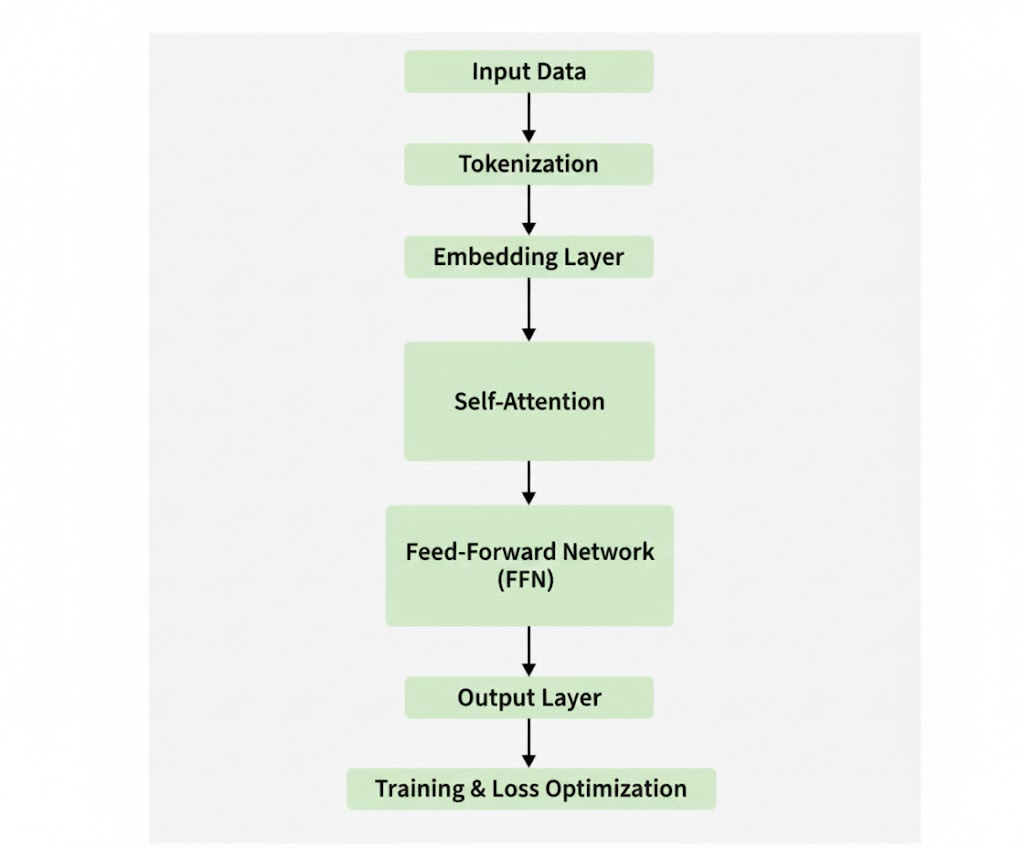

**1. Input Data**

Le texte brut fourni par l'utilisateur : phrase, question, document.

**2. Tokenization**

Transformation du texte en tokens
→ puis en IDs numériques.

Le modèle **ne voit jamais le texte directement**, seulement des nombres.

**3. Embedding Layer**

Chaque ID devient un vecteur dense.
Le modèle obtient alors une séquence de vecteurs représentant le texte.

**4. Transformer Blocks**

La partie principale du modèle.
Chaque bloc contient :

* un module **Self-Attention**,
* un module **Feed-Forward Network**,

- Normalisation & Résidus.

**5. Self-Attention Mechanism**

Étape où chaque token regarde tous les autres pour déterminer :

* quelles informations sont importantes,
* quelles dépendances sont nécessaires,
* comment comprendre le contexte global.

**6. Feed-Forward Network**

Chaque token passe ensuite dans un petit réseau MLP qui affine sa représentation.

**7. Output Layer**

À partir de la dernière représentation, le modèle produit :

* un vecteur de logits → scores pour chaque token du vocabulaire
  → permet de choisir le prochain token.

**8. Training & Loss Optimization**

Pendant l’entraînement :

* Le modèle compare le token prédit au vrai token
* Calcule la perte (cross-entropy loss)
* Met à jour les poids (backpropagation + Adam)

---

# **III. Manipulation d’un LLM avec HuggingFace**

## **1. Charger Phi-3 Mini et son tokenizer**

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Nom du modèle
model_name = "microsoft/Phi-3-mini-4k-instruct"

# Charger le tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Charger le modèle
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,   # modèle plus rapide
    device_map="auto"            # utilise GPU si disponible
)

print("Phi-3 Mini chargé !")
print("Taille du vocabulaire :", tokenizer.vocab_size)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Phi-3 Mini chargé !
Taille du vocabulaire : 32000


## 1.1. Afficher tout le vocabulaire (non trié)

In [2]:
vocab = tokenizer.get_vocab()
print(vocab)

{'▁efect': 19208, 'emi': 14208, 'beans': 11700, 'чу': 9797, 'protocol': 20464, 'enne': 4584, 'pa': 3274, 'office': 20205, '▁aff': 2756, '▁С': 857, '▁боль': 9935, '▁confirm': 9659, 'associ': 21264, '▁Maven': 26435, '▁Nations': 18269, '▁squ': 10674, '▁highlight': 12141, '▁Vas': 15453, '▁You': 887, '▁Altri': 7057, 'angle': 2521, '▁equipment': 21083, '▁allowing': 14372, 'modal': 15601, 'ütt': 17635, 'nih': 13428, '▁proces': 14177, 'ów': 2165, 'ственный': 18040, 'getName': 19629, '▁Philadelphia': 18292, '▁servir': 28644, 'mania': 20977, 'binom': 16183, 'roit': 15164, '間': 31069, '▁július': 27646, '▁crash': 8095, 'ŝ': 31805, '▁ajax': 9349, 'ṛ': 31056, '▁modelo': 29472, '▁project': 2060, 'shadow': 17505, '▁newsp': 14578, '್': 31623, '▁kter': 8134, 'ClickListener': 11676, '▁anonymous': 21560, 'цер': 17267, 'autore': 28629, '▁wenn': 13588, '▁Natur': 8746, 'Graphics': 17290, '▁estat': 21565, '▁mol': 6062, 'пра': 8821, '▁measures': 15366, '▁publications': 25964, '▁nicely': 28138, 'domin': 24130, 

## 1.2. Afficher le vocabulaire trié par ID

In [3]:
vocab = tokenizer.get_vocab()

# Trier par ID (sinon l'ordre est aléatoire)
vocab_sorted = sorted(vocab.items(), key=lambda x: x[1])

# Afficher les 20 premiers
for token, idx in vocab_sorted[:-10]:
    print(idx, "→", token)


Streaming output truncated to the last 5000 lines.
27001 → ▁tinha
27002 → vole
27003 → ▁gle
27004 → ucci
27005 → ▁siehe
27006 → Jack
27007 → ▁woll
27008 → ▁elder
27009 → ▁кораб
27010 → ▁engag
27011 → ▁Laurent
27012 → ▁achiev
27013 → istik
27014 → arct
27015 → тного
27016 → ▁gir
27017 → ▁Singh
27018 → mathop
27019 → USA
27020 → ▁Projekt
27021 → ▁debe
27022 → richtung
27023 → ▁Tsch
27024 → uminate
27025 → ▁szó
27026 → lyph
27027 → зидент
27028 → ▁limitations
27029 → ющей
27030 → ▁bila
27031 → Push
27032 → ▁offering
27033 → iennes
27034 → Fri
27035 → ▁postgresql
27036 → ▁Tommy
27037 → ▁particolare
27038 → ▁století
27039 → ▁arrib
27040 → ▁Eva
27041 → school
27042 → ▁vendor
27043 → ▁Dallas
27044 → ▁prolong
27045 → CREATE
27046 → ▁suivante
27047 → STATUS
27048 → là
27049 → kv
27050 → ▁häufig
27051 → ▁Agricult
27052 → ▁huit
27053 → ▁inoltre
27054 → ▁Lloyd
27055 → ▁француз
27056 → ▁выпол
27057 → ▁faithful
27058 → ▁Вар
27059 → ▁verl
27060 → ▁juego
27061 → ▁Резултати
27062 → ,...,
27063 → ▁impli

## 1.3. Afficher quelques tokens à partir de leurs IDs

In [4]:
ids = [0, 1, 2, 3, 100, 2048]  # exemple
print(tokenizer.convert_ids_to_tokens(ids))

['<unk>', '<s>', '</s>', '<0x00>', '<0x61>', '▁build']


## 2. Tokenization

In [5]:
text = "Les modèles de langage sont puissants."

# Tokenisation
encoding = tokenizer(text)

# Tokens lisibles
tokens = tokenizer.convert_ids_to_tokens(encoding["input_ids"])

# IDs numériques
ids = encoding["input_ids"]

print("Texte :", text)
print("\nTokens :", tokens)
print("\nIDs :", ids)
print("\nNombre de tokens :", len(tokens))


Texte : Les modèles de langage sont puissants.

Tokens : ['▁Les', '▁mod', 'è', 'les', '▁de', '▁lang', 'age', '▁sont', '▁pu', 'iss', 'ants', '.']

IDs : [2664, 878, 30000, 793, 316, 6361, 482, 3435, 2653, 790, 1934, 29889]

Nombre de tokens : 12


In [6]:
encoding = tokenizer(
    text,
    max_length=10,        # limite la séquence à 12 tokens
    truncation=True,      # coupe si le texte dépasse 12 tokens
)
tokens = tokenizer.convert_ids_to_tokens(encoding["input_ids"])

print("Tokens :", tokens)
print("Nombre de tokens :", len(tokens))


Tokens : ['▁Les', '▁mod', 'è', 'les', '▁de', '▁lang', 'age', '▁sont', '▁pu', 'iss']
Nombre de tokens : 10


In [7]:
text = "Artificial intelligence is transforming the world."

# Tokenisation
encoding = tokenizer(text)

# Tokens lisibles
tokens = tokenizer.convert_ids_to_tokens(encoding["input_ids"])

# IDs numériques
ids = encoding["input_ids"]

print("\nTokens :", tokens)
print("\nIDs :", ids)
print("\nNombre de tokens :", len(tokens))



Tokens : ['▁Art', 'ific', 'ial', '▁intelligence', '▁is', '▁transform', 'ing', '▁the', '▁world', '.']

IDs : [3012, 928, 616, 21082, 338, 4327, 292, 278, 3186, 29889]

Nombre de tokens : 10


## 3. Comparaison de deux tokenizers (Phi-3 vs GPT-2)

In [8]:
tok_gpt2 = AutoTokenizer.from_pretrained("gpt2")

text = "Artificial intelligence is transforming the world."

# Tokenisation
encoding2 = tok_gpt2(text)

# Tokens lisibles
tokens = tok_gpt2.convert_ids_to_tokens(encoding2["input_ids"])

# IDs numériques
ids = encoding2["input_ids"]

print("\n--- Tokenization GPT-2 ---")

print("\nTokens :", tokens)
print("\nIDs :", ids)
print("\nNombre de tokens :", len(tokens))

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


--- Tokenization GPT-2 ---

Tokens : ['Art', 'ificial', 'Ġintelligence', 'Ġis', 'Ġtransforming', 'Ġthe', 'Ġworld', '.']

IDs : [8001, 9542, 4430, 318, 25449, 262, 995, 13]

Nombre de tokens : 8


**Explication**

- GPT-2 utilise “Ġ” pour l’espace
- Phi-3 utilise le symbole “▁” pour l’espace
- Phi-3 est plus multilingue : Il peut tokeniser "génération", "الذكاء", "人工智能" beaucoup mieux que GPT-2.

**Tokenisez la même phrase avec deux tokenizers différents :**

- bert-base-uncased

- roberta-base

Puis comparez les résultats.

## 3. Décodage

In [9]:
ids = [3012, 928, 616, 21082]  # exemple de token IDs de Phi-3
decoded_text = tokenizer.decode(ids)

print("IDs :", ids)
print("Texte décodé :", decoded_text)

IDs : [3012, 928, 616, 21082]
Texte décodé : Artificial intelligence


## 4. Embeddings

In [10]:
# Récupérer la matrice d'embeddings
embedding_matrix = model.get_input_embeddings().weight

print("Shape de la matrice d'embeddings :", embedding_matrix.shape)

Shape de la matrice d'embeddings : torch.Size([32064, 3072])


**Explication**

- 32064 = nombre de tokens dans le vocabulaire

- 3072 = dimension du vecteur pour chaque token

In [11]:
# On prend le premier token
first_id = encoding["input_ids"][0]

# On récupère son embedding
first_embedding = embedding_matrix[first_id]

print("Token :", tokenizer.convert_ids_to_tokens([first_id]))
print("Shape du vecteur :", first_embedding.shape)
print("\nPremières valeurs du vecteur :\n", first_embedding[:10])

Token : ['▁Art']
Shape du vecteur : torch.Size([3072])

Premières valeurs du vecteur :
 tensor([ 0.0435,  0.0364,  0.0266, -0.0349, -0.0145, -0.0330,  0.0007,  0.0015,
        -0.0461, -0.0125], device='cuda:0', dtype=torch.float16,
       grad_fn=<SliceBackward0>)


# 5. Génération de texte avec Phi-3 Mini

In [12]:
prompt = "Explain the importance of artificial intelligence in education."

inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

# Génération simple
output_ids = model.generate(
    **inputs,
    max_length=100,       # limite du nombre total de tokens générés
    do_sample=False       # pas d'aléatoire
)

generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

generated_text

Explain the importance of artificial intelligence in education. Artificial intelligence (AI) plays a crucial role in modern education by enhancing personalized learning, improving accessibility, and streamlining administrative tasks. AI can adapt to the learning pace and style of individual students, providing customized resources and feedback. This personalization helps students to better understand and retain information. AI also makes education more accessible by offering online tutoring and language translation services, breaking down geographical


**Explication**

- return_tensors="pt" → retourne les sorties du tokenizer sous forme de tenseurs PyTorch

- max_length=100 → limite la taille de la réponse

- do_sample=False → pas de créativité, réponse déterministe

- skip_special_tokens=True → par exemple : \<bos> : début de phrase, \<eos> : fin de phrase

In [15]:
output_ids = model.generate(
    **inputs,
    max_length=120,
    do_sample=True,     # active sampling
    temperature=0.7,     # contrôle la créativité
    top_k=50,           # ne garde que les 50 meilleurs tokens
    top_p=0.9          # garde 90% de la probabilité totale
)

generated_text2 = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(generated_text2)

Explain the importance of artificial intelligence in education. Artificial Intelligence (AI) has become a transformative force in education, offering personalized learning experiences, efficiency in administrative tasks, and innovative teaching tools. AI can adapt to the learning pace of students, identify knowledge gaps, and provide customized resources to enhance learning outcomes. Administratively, AI streamlines processes like grading and scheduling, allowing educators to focus more on teaching. Furthermore, AI-driven educational tools, such as intelligent tutoring systems, offer interactive and adaptive


**Explication**

- temperature :
        
        < 1.0 → texte plus logique
        = 1.0 → Équilibre standard
        > 1.0 → texte plus créatif, parfois chaotique

- top_k : Garde seulement les K tokens les plus probables.

- top_p : Garde les tokens qui couvrent p % de la probabilité totale.

- do_sample=True : Active le mode créatif. Tire au hasard un token selon une distribution

In [16]:
output_ids = model.generate(
    **inputs,
    max_length=120,
    do_sample=True,     # active sampling
    top_k=50,           # ne garde que les 50 meilleurs tokens
    top_p=0.9,          # garde 90% de la probabilité totale
    temperature=0.7     # contrôle la créativité
)

generated_text3 = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(generated_text3)

Explain the importance of artificial intelligence in education. Artificial intelligence (AI) has the potential to revolutionize education by providing personalized learning experiences, improving administrative efficiency, and offering new ways to engage students. Personalized learning through AI allows for adaptive learning environments that cater to individual student needs, strengths, and weaknesses. AI can analyze data on student performance to tailor content, pace, and learning strategies. This can help students learn more effectively and at their own pace, reducing frustration and improving outcomes. AI can also autom


# 6. Évaluation du texte généré

## 1. BLEU Score

BLEU mesure la similarité lexicale entre le texte généré et un texte de référence.
Il compare les n-grams (séquences de mots).

**Exemple :**

- n−gram 1 → “artificial”, “intelligence”, “education”

- n−gram 2 → “artificial intelligence”, “importance of”, etc.

Plus les n-grams du texte généré apparaissent aussi dans la référence,

➡️ plus le score BLEU est élevé.

**Interprétation :**

- 0.8 – 1.0 : très proche du texte référence (rare en génération libre)

- 0.5 – 0.8 : similaire dans les mots utilisés, phrase correcte

- 0.2 – 0.5 : paraphrasé, structure différente

- < 0.2 : très différent dans les mots

👉 BLEU mesure les mots, pas le sens.

In [17]:
reference = "Artificial intelligence is transforming many fields such as education and healthcare."

In [18]:
from nltk.translate.bleu_score import sentence_bleu

reference_tokens = [reference.split()]
generated_tokens = generated_text.split()

bleu = sentence_bleu(reference_tokens, generated_tokens)
print("BLEU Score :", bleu)


BLEU Score : 2.494821638843469e-155


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [19]:
from nltk.translate.bleu_score import sentence_bleu

reference_tokens = [reference.split()]
generated_tokens = generated_text2.split()

bleu = sentence_bleu(reference_tokens, generated_tokens)
print("BLEU Score :", bleu)


BLEU Score : 2.533776972251024e-155


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [20]:
from nltk.translate.bleu_score import sentence_bleu

reference_tokens = [reference.split()]
generated_tokens = generated_text3.split()

bleu = sentence_bleu(reference_tokens, generated_tokens)
print("BLEU Score :", bleu)


BLEU Score : 2.294894159058245e-155


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


## 2. ROUGE Score

ROUGE mesure le rappel :

➡️ est-ce que le texte généré reprend les idées importantes présentes dans la référence ?

**Les variantes :**

- ROUGE-1 : Compare les mots individuels

- ROUGE-2 : Compare les bigrams (paires de mots)

- ROUGE-L : Compare la plus longue séquence commune

**Pourquoi ces trois métriques ensemble ?**

- ROUGE-1 
→ Est-ce que le modèle parle des bons concepts ?

- ROUGE-2
→ Est-ce que les idées sont bien enchaînées ?

- ROUGE-L
→ Est-ce que la structure générale ressemble à la référence ?

👉 Aucune n’est suffisante seule.

**Interprétation :**

- \> 0.6 : les idées principales du texte référence sont bien couvertes

- 0.4 – 0.6 : bonne couverture mais partielle

- < 0.4 : beaucoup d’idées manquantes

In [26]:
!pip install rouge

In [27]:
from rouge import Rouge

rouge = Rouge()
scores = rouge.get_scores(generated_text, reference)
print(scores)


[{'rouge-1': {'r': 0.36363636363636365, 'p': 0.06779661016949153, 'f': 0.11428571163673476}, 'rouge-2': {'r': 0.1, 'p': 0.014084507042253521, 'f': 0.02469135586038733}, 'rouge-l': {'r': 0.36363636363636365, 'p': 0.06779661016949153, 'f': 0.11428571163673476}}]


| Lettre | Nom       | Question                          |
| ------ | --------- | --------------------------------- |
| r      | Recall    | Qu’est-ce que j’ai couvert ?      |
| p      | Precision | Qu’est-ce que j’ai dit de juste ? |
| f      | F1-score  | Bon équilibre ?                   |


In [28]:
from rouge import Rouge

rouge = Rouge()
scores = rouge.get_scores(generated_text2, reference)
print(scores)


[{'rouge-1': {'r': 0.5454545454545454, 'p': 0.09230769230769231, 'f': 0.15789473436634352}, 'rouge-2': {'r': 0.1, 'p': 0.012987012987012988, 'f': 0.022988503712511744}, 'rouge-l': {'r': 0.5454545454545454, 'p': 0.09230769230769231, 'f': 0.15789473436634352}}]


In [29]:
from rouge import Rouge

rouge = Rouge()
scores = rouge.get_scores(generated_text3, reference)
print(scores)


[{'rouge-1': {'r': 0.36363636363636365, 'p': 0.0625, 'f': 0.10666666416355562}, 'rouge-2': {'r': 0.1, 'p': 0.012048192771084338, 'f': 0.021505374424789166}, 'rouge-l': {'r': 0.36363636363636365, 'p': 0.0625, 'f': 0.10666666416355562}}]


## 3. BERT Score

BERTScore compare le texte généré et la référence dans l’espace des embeddings.
Donc il compare le sens, pas seulement les mots.

Plus les embeddings des phrases sont proches → plus le score F1 est élevé.

**Interprétation générale :**

- 0.85 – 1.00 : sens très proche (excellente réponse)

- 0.70 – 0.85 : sens global similaire, formulation différente

- 0.50 – 0.70 : réponse partiellement correcte

- < 0.50 : sens éloigné (pas une bonne réponse)

In [ ]:
!pip install bert-score

In [33]:
from bert_score import score as bertscore

P, R, F1 = bertscore([generated_text], [reference], lang="en")
print("BERTScore F1 :", F1.mean().item())


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1 : 0.8664911389350891


In [31]:
from bert_score import score as bertscore

P, R, F1 = bertscore([generated_text2], [reference], lang="en")
print("BERTScore F1 :", F1.mean().item())


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1 : 0.8625370860099792


In [32]:
from bert_score import score as bertscore

P, R, F1 = bertscore([generated_text3], [reference], lang="en")
print("BERTScore F1 :", F1.mean().item())


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1 : 0.8652557134628296


## 4. Perplexity

La perplexité mesure à quel point un texte généré est facile ou difficile à prédire pour un modèle de langage.

**Interprétation :**

- < 20 : très fluide

- 20–50 : bon

- 50–100 : acceptable

- \> 100 : peu naturel

In [34]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import torch

# Charger un modèle pour calculer perplexité (pas besoin de GPU)
ppl_model = GPT2LMHeadModel.from_pretrained("gpt2")
ppl_tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

inputs_ppl = ppl_tokenizer(generated_text, return_tensors="pt")

with torch.no_grad():
    loss = ppl_model(**inputs_ppl, labels=inputs_ppl["input_ids"]).loss

perplexity = torch.exp(loss)
print("Perplexity:", perplexity.item())


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Perplexity: 26.71560287475586


In [35]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import torch

# Charger un modèle pour calculer perplexité (pas besoin de GPU)
ppl_model = GPT2LMHeadModel.from_pretrained("gpt2")
ppl_tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

inputs_ppl = ppl_tokenizer(generated_text2, return_tensors="pt")

with torch.no_grad():
    loss = ppl_model(**inputs_ppl, labels=inputs_ppl["input_ids"]).loss

perplexity = torch.exp(loss)
print("Perplexity:", perplexity.item())


Perplexity: 24.6514835357666


In [36]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import torch

# Charger un modèle pour calculer perplexité (pas besoin de GPU)
ppl_model = GPT2LMHeadModel.from_pretrained("gpt2")
ppl_tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

inputs_ppl = ppl_tokenizer(generated_text3, return_tensors="pt")

with torch.no_grad():
    loss = ppl_model(**inputs_ppl, labels=inputs_ppl["input_ids"]).loss

perplexity = torch.exp(loss)
print("Perplexity:", perplexity.item())


Perplexity: 17.644485473632812
